# DSAI-Basketball
jupyter notebook to analyze a dataset of nba basketball players statistics

In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = (10, 8)

basketball = pd.read_csv("./data/NBA_Player_Stats_2.csv", na_values=['Not Provided'])
basketball.sample(10)

,Rk,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,...,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,Season,MVP
6477,78,DeMarre Carroll,SF,23,MEM,71,1,11.2,1.2,3.1,...,1.4,2.1,0.5,0.4,0.1,0.3,1.5,2.9,2009-10,False
8889,162,Rudy Gay,SF,27,SAC,55,55,34.4,7.4,15.3,...,4.0,5.5,3.1,1.2,0.6,3.0,2.3,20.1,2013-14,False
3855,217,Antawn Jamison,PF,28,WAS,68,68,38.3,7.6,17.5,...,5.3,7.6,2.3,0.8,0.2,1.7,2.2,19.6,2004-05,False
14420,493,Dennis Schröder,PG,28,HOU,15,4,26.9,3.7,9.3,...,2.9,3.3,5.9,0.8,0.2,2.6,2.5,10.9,2021-22,False
1335,266,Ron Mercer,SG,23,ORL,31,31,31.3,6.1,15.1,...,2.0,3.2,1.7,1.4,0.3,2.1,2.5,15.2,1999-00,False
12863,354,Johnathan Motley,PF,24,LAC,13,0,3.2,0.8,1.2,...,0.5,0.8,0.6,0.2,0.0,0.4,0.5,2.2,2019-20,False
1673,132,Adonal Foyle,C,25,GSW,58,37,25.1,2.7,6.5,...,4.3,7.0,0.8,0.5,2.7,1.4,2.3,5.9,2000-01,False
13367,231,Talen Horton-Tucker,SG,20,LAL,65,4,20.1,3.4,7.5,...,2.2,2.6,2.8,1.0,0.3,1.6,2.0,9.0,2020-21,False
6781,304,Jameer Nelson,PG,27,ORL,65,64,28.6,4.9,10.9,...,2.6,3.0,5.4,0.7,0.0,2.1,2.3,12.6,2009-10,False
10964,396,Luis Scola,PF,36,BRK,36,1,12.8,2.0,4.2,...,2.4,3.9,1.0,0.4,0.1,0.9,1.8,5.1,2016-17,False


In [4]:
def get_first(position):
    return position.split('-')[0]

In [5]:
df = pd.DataFrame(data=basketball)
df['PosN'] = df.Pos.apply(get_first)
pts_higher_ten = df[df['PTS'] >= 10]
sns.set_palette(sns.color_palette("pastel"))

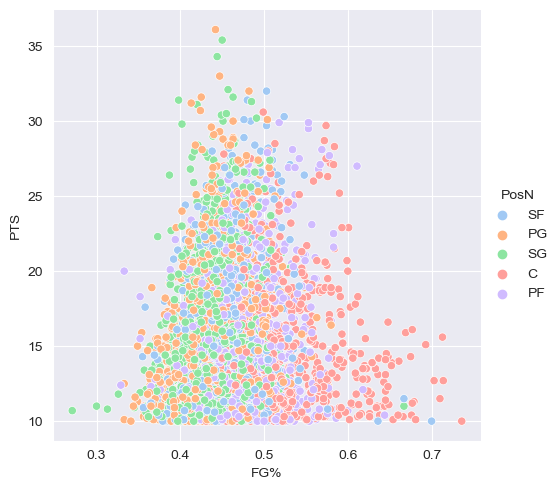

In [6]:
sns.relplot(data=pts_higher_ten, x="FG%", y="PTS", hue="PosN")

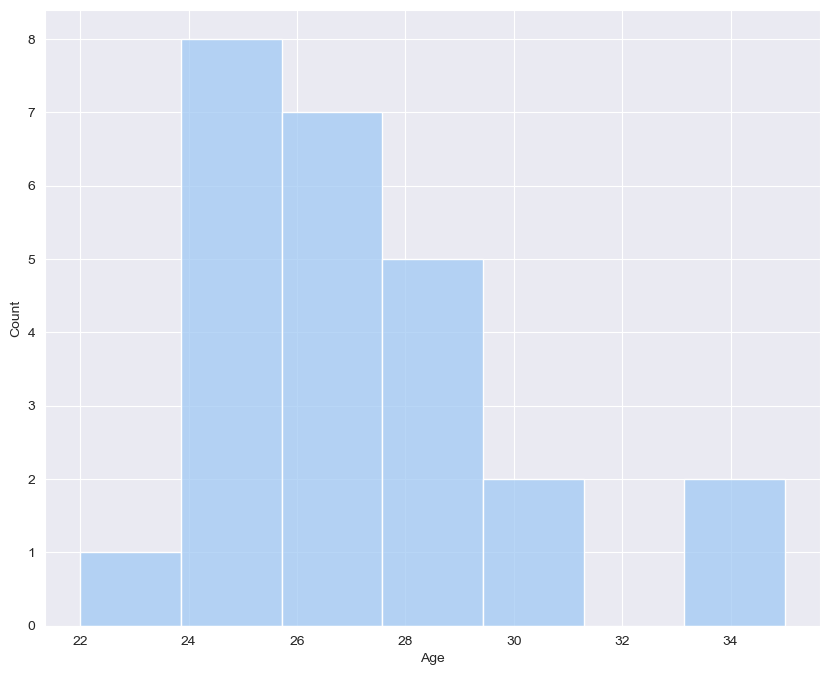

In [7]:
mvp = df[df['MVP'] == True]
sns.histplot(data=mvp, x="Age")

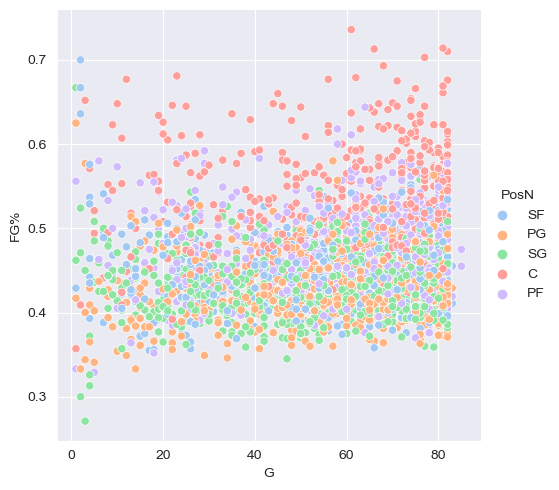

In [8]:
sns.relplot(data=pts_higher_ten, x="G", y="FG%", hue="PosN")

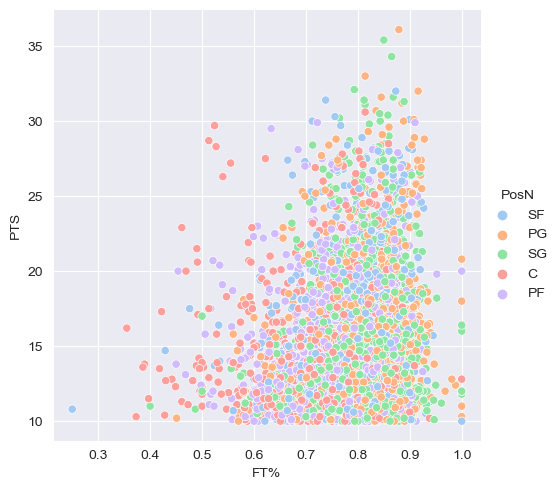

In [9]:
sns.relplot(data=pts_higher_ten, x="FT%", y="PTS", hue="PosN")